In [ ]:
!pip install -U -q PyDrive


import pandas as pd
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats


import numpy as np

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials
from os.path import exists as file_exists


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
googleDrive = GoogleDrive(gauth)


drive.mount('/content/gdrive')

#leitura do arquivo
!ls "/content/gdrive/MyDrive/Colab Notebooks/"
file = '/content/gdrive/MyDrive/Colab Notebooks/files/1.csv'

file2 = '/content/gdrive/MyDrive/Colab Notebooks/files/2.csv'
file3 = '/content/gdrive/MyDrive/Colab Notebooks/files/3.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
 CdiasExercicio2.ipynb	   Lista3-2.ipynb
 estatistica		   lista3.ipynb
 Exercicio2-parte2.ipynb   medidas_estatisticas.ipynb
 Exercicios-2.ipynb	   palavras.txt
 files			   parrot.ipynb
 IA-LAB1		  'Política e COVID.ipynb'
 ImagemCloud.ipynb	  'Política e COVID_NOVO.ipynb'
 Lista1-IA.ipynb	   -SupervisedLearning.ipynb
 lista1.ipynb		   SupervisedLearning.ipynb
 lista2.ipynb		   tempoxclasse.ipynb


# DataSet com dados de acelerômetro



In [ ]:
url = file2
df = pd.read_csv(url)

df

,indice,x,y,z,movimento
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1
...,...,...,...,...,...
249745,138000.0,2150,2316,1979,7
249746,138000.0,2142,2314,1985,7
249747,138000.0,2139,2301,1992,7
249748,138000.0,2136,2315,1990,7


In [ ]:
valuesDf = df.drop(columns=['indice', 'movimento'], axis=1)
valuesDf.describe()

,x,y,z
count,249750.000000,249750.000000,249750.000000
mean,2008.108533,2350.154635,1975.270683
std,109.622696,65.453446,111.694788
min,1094.000000,2.000000,2.000000
25%,1911.000000,2330.000000,1952.000000
50%,1975.000000,2359.000000,1988.000000
75%,2124.000000,2382.000000,2033.000000
max,3625.000000,4094.000000,4094.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249750 entries, 0 to 249749
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   indice     249750 non-null  float64
 1   x          249750 non-null  int64  
 2   y          249750 non-null  int64  
 3   z          249750 non-null  int64  
 4   movimento  249750 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 9.5 MB


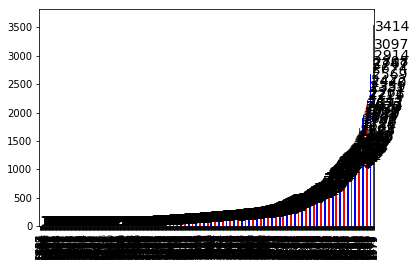

In [ ]:
# Característica do conjunto original
ax = df['x'].value_counts(ascending=True).plot(kind='bar', color=['r','b']);
#inserir legendas acima das barras
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=14)

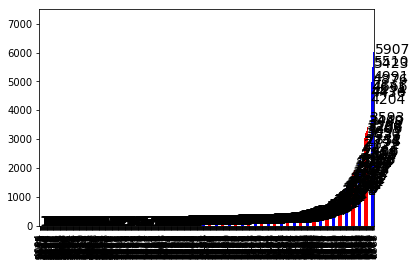

In [ ]:
# Característica do conjunto original
ay = df['y'].value_counts(ascending=True).plot(kind='bar', color=['r','b']);
#inserir legendas acima das barras
for p in ay.patches:
  ay.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=14)

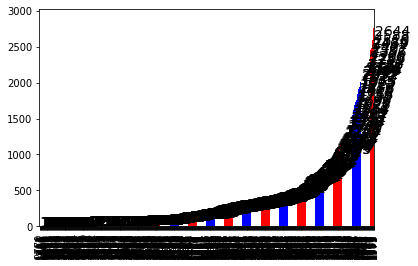

In [ ]:
# Característica do conjunto original
az = df['z'].value_counts(ascending=True).plot(kind='bar', color=['r','b']);
#inserir legendas acima das barras
for p in az.patches:
  az.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=14)

In [ ]:

X = df[['x', 'y', 'z']]
y = df['movimento']

print(X.shape)
print(y.shape)



(249750, 3)
(249750,)


# Sumarização dos dados

In [ ]:
print('Quantidade de Movimentos: ', df.movimento.unique())

print(np.bincount(y))
print(df.movimento.value_counts())
#see seaborn chart

print('\n# Qtde. movimento 1 = '+str(len(df.loc[df['movimento'] == 1])))

Quantidade de Movimentos:  [1 2 3 4 5 6 7 0]
[  269 77827  4418 31376 34824  7101 10017 83918]
7    83918
1    77827
4    34824
3    31376
6    10017
5     7101
2     4418
0      269
Name: movimento, dtype: int64

# Qtde. movimento 1 = 77827


## Divisão do conjunto de dados
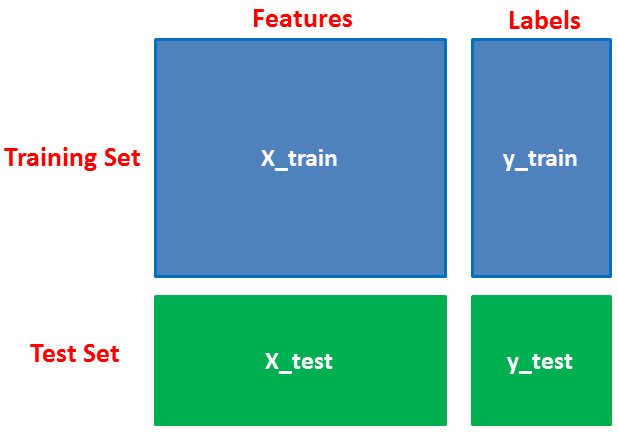


In [ ]:
from sklearn.model_selection import train_test_split
# Divisão do conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#verificar dimensões dos subconjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((174825, 3), (74925, 3), (174825,), (74925,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
print("KNN accuracy on test set: ", knn.score(X_test, y_test))


KNN accuracy on test set:  0.7903636970303637


# Validação Cruzada, Matriz de Confusão e Gráficos
**VALIDAÇÃO CRUZADA**


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, X, y, cv=10)
print('Cross-validation score with 10 folds:', cv_scores)
print('Mean cross-validation score with 10 folds: {:.3f}'.format(np.mean(cv_scores)))


Cross-validation score with 10 folds: [0.66484487 0.76140026 0.77502172 0.69912273 0.65107349 0.70006727
 0.61379562]
Mean cross-validation score with 10 folds: 0.695


**MATRIZ DE CONFUSÃO**

In [ ]:
#from sklearn.metrics import confusion_matrix
#confusion = confusion_matrix(y, knn.predict(X))
#confusion
pd.crosstab(y, knn.predict(X), colnames=['Predita'])

Predita,0,1,2,3,4,5,6,7
movimento,,,,,,,,
0,9,0,0,0,0,0,63,197
1,0,76358,582,85,464,93,20,225
2,0,1587,1757,148,520,44,19,343
3,1,56,74,20016,3674,649,402,6504
4,0,546,134,2656,27089,446,314,3639
5,0,180,25,1936,1747,2261,62,890
6,4,94,19,662,1798,179,3829,3432
7,10,249,107,4458,3880,348,1775,73091


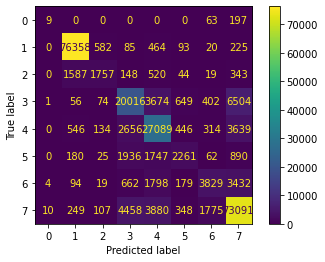

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X, y, values_format = 'd')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = knn.predict(X_test)
print("Relatório de classificação: \n", classification_report(y_test, y_pred))  

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.96      0.98      0.97     23245
           2       0.57      0.33      0.42      1332
           3       0.61      0.59      0.60      9500
           4       0.65      0.74      0.69     10448
           5       0.46      0.26      0.33      2180
           6       0.50      0.33      0.39      3051
           7       0.80      0.85      0.83     25086

    accuracy                           0.79     74925
   macro avg       0.57      0.51      0.53     74925
weighted avg       0.78      0.79      0.78     74925



# Normalizar o Dataframe de Pandas com o mean Normalização

A normalização mean é uma das maneiras mais fáceis de normalizar os Dataframes de intervalos variados. A normalização é feita subtraindo a média e dividindo pelo desvio padrão para todos os elementos do dataframe.

In [ ]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [ ]:
print(mean_norm(df))

          indice         x         y         z  movimento
0      -1.682853 -4.616823 -2.064897  1.591205  -1.208448
1      -1.682828 -3.111660 -4.249656  0.642190  -1.208448
2      -1.682803 -3.622503 -6.006630 -0.620178  -1.208448
3      -1.682778 -3.713725 -6.281635 -1.291651  -1.208448
4      -1.682753 -3.330593 -5.884406 -0.861908  -1.208448
...          ...       ...       ...       ...        ...
249745  1.757435  1.294362 -0.521816  0.033388   1.195230
249746  1.757435  1.221385 -0.552372  0.087106   1.195230
249747  1.757435  1.194018 -0.750986  0.149777   1.195230
249748  1.757435  1.166651 -0.537094  0.131871   1.195230
249749  1.757435  1.148407 -0.460704  0.060247   1.195230

[249750 rows x 5 columns]


# Normalizar Pandas Dataframe com a Normalização min-max

Este é um dos métodos amplamente utilizados para a normalização. O resultado da normalização subtrai o valor mínimo de um quadro de dados e divide-o pela diferença entre o valor mais alto e mais baixo da coluna correspondente.

In [ ]:
def minmax_norm(df_input):
    return (df - df.min()) / ( df.max() - df.min())

In [ ]:
print(minmax_norm(df))

          indice         x         y         z  movimento
0       0.000000  0.161201  0.540811  0.525660   0.142857
1       0.000007  0.226393  0.505865  0.499756   0.142857
2       0.000014  0.204267  0.477761  0.465298   0.142857
3       0.000022  0.200316  0.473363  0.446970   0.142857
4       0.000029  0.216910  0.479717  0.458700   0.142857
...          ...       ...       ...       ...        ...
249745  1.000000  0.417226  0.565494  0.483138   1.000000
249746  1.000000  0.414066  0.565005  0.484604   1.000000
249747  1.000000  0.412880  0.561828  0.486315   1.000000
249748  1.000000  0.411695  0.565249  0.485826   1.000000
249749  1.000000  0.410905  0.566471  0.483871   1.000000

[249750 rows x 5 columns]


# Normalize Dataframe Pandas com a normalização quantil

A normalização quantitativa é utilizada no caso de análises de dados de alta dimensão. Observa e assume que a distribuição estatística de cada coluna é uma e a mesma. A normalização de quantidades consiste nas seguintes etapas:

    Valores de ordem dentro de cada coluna (Ranking)
    Média através de cada linha e substituir o valor de cada elemento da linha pela média
    Reordenar valores para a ordem original como inicialmente.

In [ ]:
def quantile_norm(df_input):
    sorted_df = pd.DataFrame(np.sort(df_input.values,axis=0), index=df_input.index, columns=df_input.columns)
    mean_df = sorted_df.mean(axis=1)
    mean_df.index = np.arange(1, len(mean_df) + 1)
    quantile_df =df_input.rank(method="min").stack().astype(int).map(mean_df).unstack()
    return(quantile_df)

In [ ]:
print(quantile_norm(df))

         indice        x       y        z  movimento
0         219.6    816.0  1661.0  28379.2     1108.8
1         224.2   1072.8  1359.2  22742.6     1108.8
2         285.4   1055.4  1043.0   5854.6     1108.8
3         595.4   1047.6  1034.8   4591.2     1108.8
4         711.0   1066.4  1045.6   5474.2     1108.8
...         ...      ...     ...      ...        ...
249745  29886.4  25001.0  6523.0  11802.8    19624.8
249746  29886.4  23327.2  6420.4  14497.8    19624.8
249747  29886.4  22958.2  5866.0  16292.6    19624.8
249748  29886.4  22742.4  6461.2  15802.4    19624.8
249749  29886.4  22611.6  6739.8  13234.2    19624.8

[249750 rows x 5 columns]


## Métrica Z-Score
> * A pontuação Z redimensiona e centra (normaliza) os dados e procura pontos de dados que estão muito longe de zero (centro);
* Os pontos de dados distantes de zero serão tratados como outliers. Na maioria dos casos, um limite de 3 ou -3 é usado, ou seja, se o valor de pontuação Z for maior ou menor que 3 ou -3, respectivamente, esse ponto de dados será identificado como outliers.


In [ ]:
from scipy import stats

z=np.abs(stats.zscore(df['x']))
print(z)


[4.61683178 3.111666   3.62251015 ... 1.19402035 1.1666537  1.14840927]


É difícil dizer qual ponto de dados é um outlier. Vamos tentar definir um limite (threshold) para identificar um outlier;
Neste caso usaremos o valor de limite (threshold) = 2,5



In [ ]:
threshold = 3
print(np.where(z > threshold))

(array([     0,      1,      2,      3,      4,      5,      6,      7,
            8,      9,     10,     11,     12,     13,     14,     15,
           16,     17,     18,     19,     20,     21,     22,     23,
           24,     25,     26,     27,     28,     29,     30,     31,
           32,     33,     34,     35,     37,     38,     39,     40,
           41,     42,     43,     44,     45,     46,     47,     48,
           49,     50,     51,     52,     53,     54,     55,     56,
           57,     58,     59,     60,     61,     62,     63,     64,
           65,     66,     67,     68,     69,     70,     71,     72,
           73,     74,     75,     76,     77,     78,     79,     80,
           81,     82,     83,     84,     85,     86,     87,     92,
           93,     99,    100,    101,    102,    104,    105,    106,
          107,    108,    109,    110,    111,    112,    113,    114,
          179,  53493,  63143,  63144, 113990, 113991, 113992, 113993,
     

A primeira matriz contém a lista de números de linha e a segunda matriz de respectivos números de coluna, o que significa que z [10][0] tem um Z-score superior a 3.

Interquartile Range(IQR)

A medida de variabilidade IQR, com base na divisão de um conjunto de dados em quartis chamados de primeiro, segundo e terceiro quartis; e eles são denotados por Q1, Q2 e Q3, respectivamente.

    Q1 é o valor médio na primeira metade.
    Q2 é o valor médio do conjunto.
    Q3 é o valor médio na segunda metade.


In [ ]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
print(lowqe_bound,"\n\n",upper_bound)

indice      -76199.375
x             1591.500
y             2252.000
z             1830.500
movimento       -8.000
dtype: float64 

 indice       210247.625
x              2443.500
y              2460.000
z              2154.500
movimento        16.000
dtype: float64


## Removendo Outliers
> * **Z-Score**


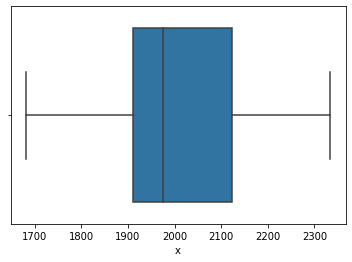

In [ ]:
z_price=df[(z < threshold)]
# Exibindo as dimensões dos DataFrames com e sem outlier
df.shape,z_price['x'].shape

sns.boxplot(x=z_price['x'])

**GRÁFICOS**

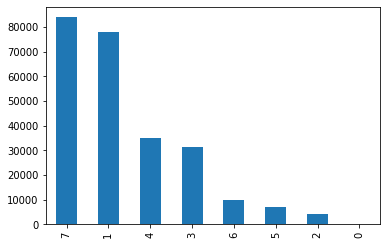

In [ ]:
#number of examples in each class 
%matplotlib inline


df.movimento.value_counts().plot(kind='bar')

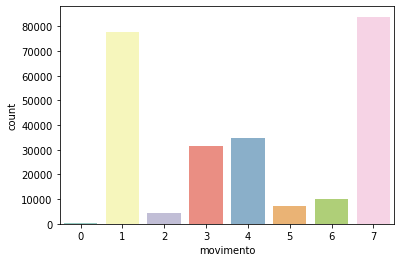

In [ ]:
import seaborn as sns
%matplotlib inline
sns.countplot(x=df['movimento'], palette="Set3")
plt.show()

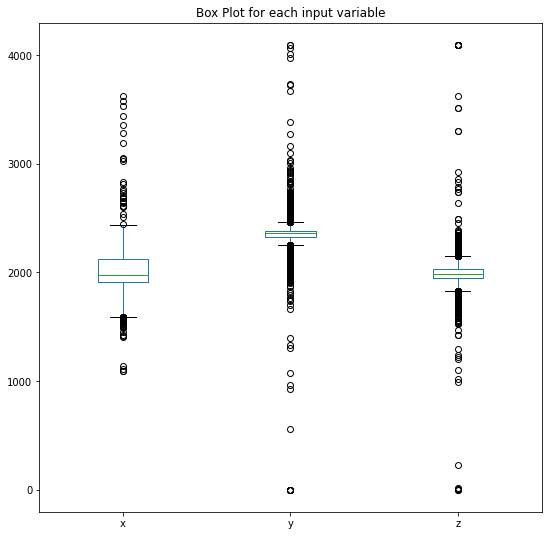

In [ ]:
values = df.drop(columns=['indice', 'movimento'], axis=1)
values.plot(kind='box', subplots=False, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each input variable')
plt.savefig('coordenadas')
plt.show()

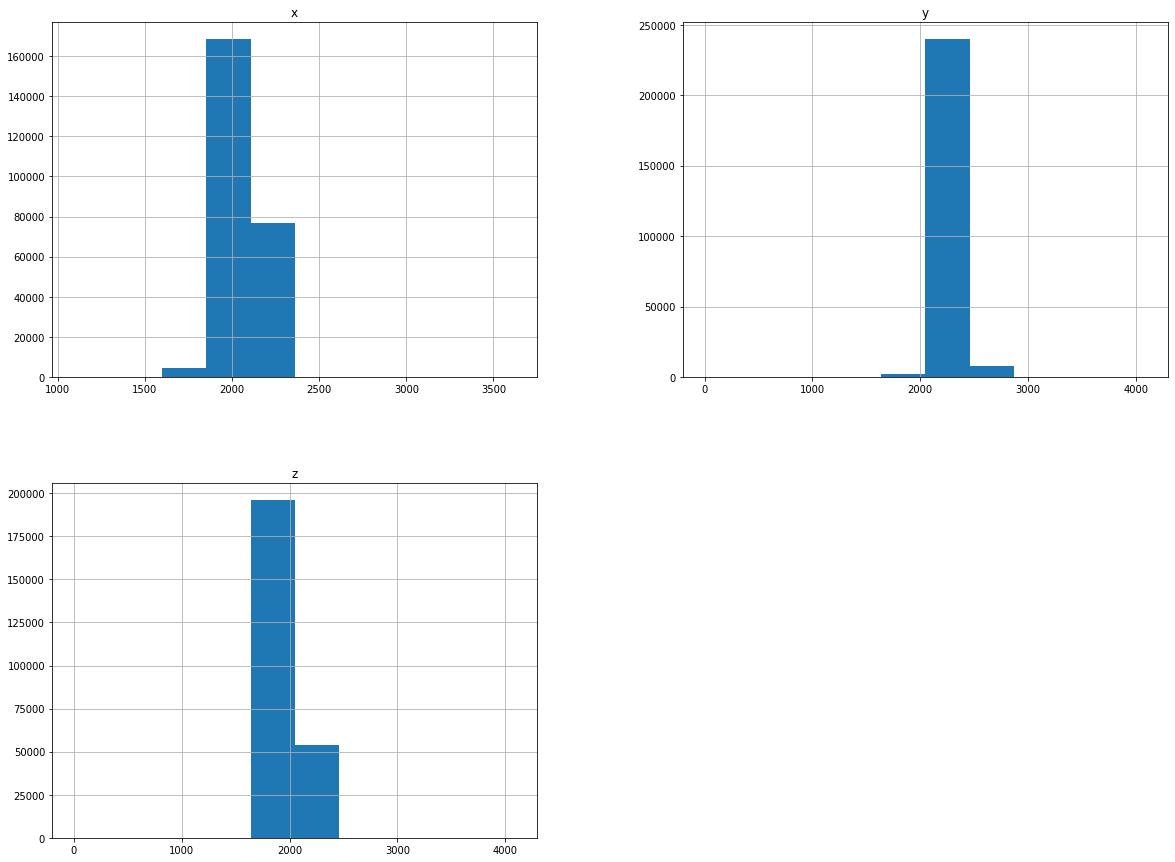

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
values = df.drop(columns=['indice', 'movimento'], axis=1)
values.hist(column=['x', 'y', 'z'], bins=10, figsize=(20,15))
plt.show()

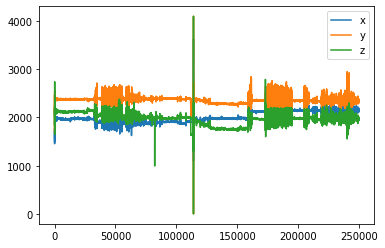

In [ ]:
%matplotlib inline
values = df.drop(columns=['indice', 'movimento'], axis=1)
values.plot()



[4.61683178 3.111666   3.62251015 ... 1.19402035 1.1666537  1.14840927]
(array([     0,      1,      2, ..., 249747, 249748, 249749]),)


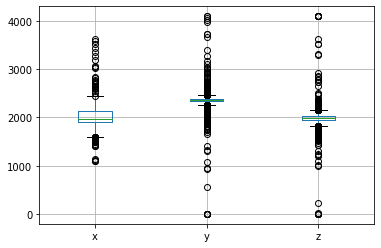

In [ ]:
df.boxplot(column=['x','y','z'])

x=np.abs(stats.zscore(df['x']))
print(x)

threshold = 2000
print(np.where(x < threshold))

df.x = x

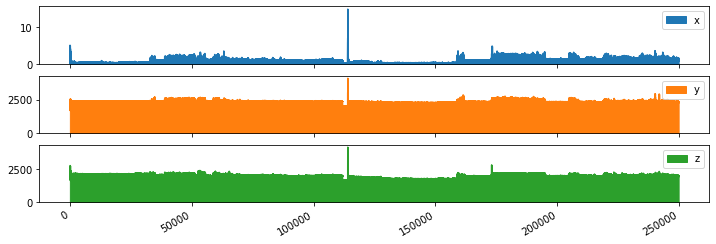

In [ ]:
values = df.drop(columns=['indice', 'movimento'], axis=1)
axs = values.plot.area(figsize=(12, 4), subplots=True)

Text(0, 0.5, 'Movimento')

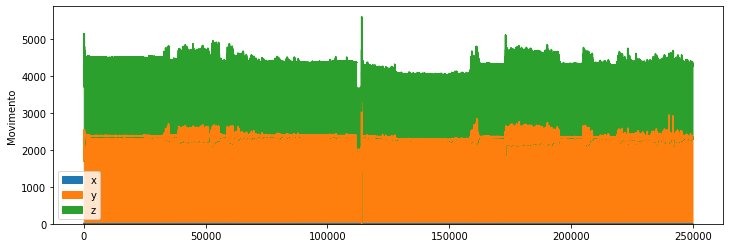

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))
values.plot.area(ax=axs)
axs.set_ylabel("Movimento")
#fig.savefig("movimento.png")